/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets:
      support                                           itemsets
0    0.037037                           (air fresheners candles)
1    0.037037                                      (asian foods)
2    0.037037                                 (baby accessories)
3    0.037037                              (baby bath body care)
4    0.037037                                (baby food formula)
..        ...                                                ...
816  0.037037  (cream, shave needs, paper goods, frozen break...
817  0.037037  (marinades meat preparation, energy granola ba...
818  0.037037  (frozen produce, yogurt, nuts seeds dried frui...
819  0.037037  (popcorn jerky, soap, packaged cheese, fresh f...
820  0.037037  (packaged produce, kosher foods, frozen meat s...

[821 rows x 2 columns]

Association Rules:
                       antecedents  \
0         (air fresheners candles)   
1            (baby bath body care)   
2         (air fresheners candles)   
3    

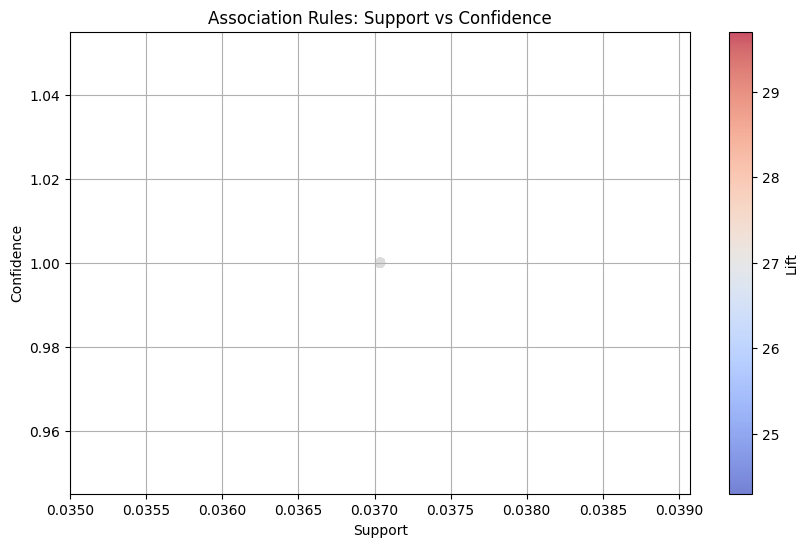

In [12]:
# ✅ Step 1: Import Libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

# ✅ Step 2: Load Your Dataset
df = pd.read_csv("10. Market Basket Analysis.csv")

# ✅ Step 3: Simulate Transactions
# Group every 5 rows into one fake 'transaction'
df['transaction_id'] = df.index // 5

# ✅ Step 4: Create Basket Format (One-Hot Encoding)
basket = df.pivot_table(index='transaction_id', columns='aisle', aggfunc=lambda x: 1, fill_value=0)

# Flatten multi-level columns if needed
basket.columns = basket.columns.droplevel(0)

# ✅ Step 5: Run Apriori
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

print("Frequent Itemsets:")
print(frequent_itemsets)

# ✅ Step 6: Generate Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

print("\nAssociation Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# ✅ Step 7: Visualize Rules
plt.figure(figsize=(10,6))
plt.scatter(rules['support'], rules['confidence'], c=rules['lift'], cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Lift')
plt.title('Association Rules: Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(True)
plt.show()
